# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [204]:
import pandas as pd

## imports for Python, Pandas

In [205]:
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [206]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [207]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [208]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [209]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [210]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

****
## Import Data


In [211]:
with open('data/world_bank_projects.json') as file:
    d = json.load(file)
wrld_bnk_df = json_normalize(data=d,record_path='mjtheme_namecode',errors='ignore',meta=[['_id','$oid'],'countrycode','country_namecode','countryshortname','mjtheme','totalamt', 'totalcommamt','status'])


#lets do some discovery
wrld_bnk_df.head()

,code,name,_id.$oid,countrycode,country_namecode,countryshortname,mjtheme,totalamt,totalcommamt,status
0,8,Human development,52b213b38594d8a2be17c780,ET,Federal Democratic Republic of Ethiopia!$!ET,Ethiopia,[Human development],130000000,130000000,Active
1,11,,52b213b38594d8a2be17c780,ET,Federal Democratic Republic of Ethiopia!$!ET,Ethiopia,[Human development],130000000,130000000,Active
2,1,Economic management,52b213b38594d8a2be17c781,TN,Republic of Tunisia!$!TN,Tunisia,"[Economic management, Social protection and ri...",0,4700000,Active
3,6,Social protection and risk management,52b213b38594d8a2be17c781,TN,Republic of Tunisia!$!TN,Tunisia,"[Economic management, Social protection and ri...",0,4700000,Active
4,5,Trade and integration,52b213b38594d8a2be17c782,TV,Tuvalu!$!TV,Tuvalu,"[Trade and integration, Public sector governan...",6060000,6060000,Active


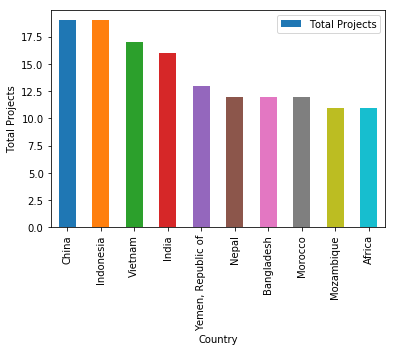

In [213]:
#Find the 10 countries with most projects
most_projects_df = wrld_bnk_df.groupby(['_id.$oid','countryshortname'], as_index=False).count().groupby('countryshortname', as_index=False)['_id.$oid'].count()

most_projects_df.columns = ['Country','Total Projects']
most_projects_shortlist_df = most_projects_df.sort_values(ascending=False,by='Total Projects').head(10)

most_projects_shortlist_df.plot(y='Total Projects',x='Country',kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Projects')
plt.show()

In [226]:
#Get the uniuqe theme names
theme_names_df = wrld_bnk_df[['code','name']]
theme_names_clean_df =  theme_names_df.loc[theme_names_df['name'] != ""].drop_duplicates()
theme_names_clean_df = theme_names_clean_df.set_index('code').sort_index()
theme_names_clean_df

['Economic management',
 'Rural development',
 'Environment and natural resources management',
 'Public sector governance',
 'Rule of law',
 'Financial and private sector development',
 'Trade and integration',
 'Social protection and risk management',
 'Social dev/gender/inclusion',
 'Human development',
 'Urban development']

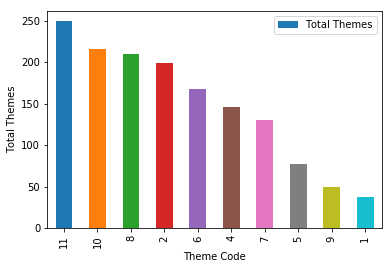

In [227]:
#Find the top 10 major project themes (using column 'mjtheme_namecode')
most_projects_themes_df = wrld_bnk_df.groupby(['code'], as_index=False)['name'].count()

most_projects_themes_df.columns = ['Theme Code','Total Themes']
most_projects_themes_shortlist_df = most_projects_themes_df.sort_values(ascending=False,by='Total Themes').head(10)

most_projects_themes_shortlist_df.plot(y='Total Themes',x='Theme Code',kind='bar')
plt.xlabel('Theme Code')
plt.ylabel('Total Themes')
plt.show()

In [217]:
#In 2. above you will notice that some entries have only the code and the name is missing. 
#Create a dataframe with the missing names filled in.

#We will use the dataframe of theme categories to fill in the missing categories.
wrld_bnk_new_df = wrld_bnk_df.copy(deep=True)
wrld_bnk_new_df['name'] = wrld_bnk_new_df['code'].apply(lambda x: theme_names_clean_df.name[x])

wrld_bnk_df == wrld_bnk_new_df


,code,name,_id.$oid,countrycode,country_namecode,countryshortname,mjtheme,totalamt,totalcommamt,status
0,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True
